# Set up

In [ ]:
# import library

import tensorflow as tf
tf.config.run_functions_eagerly(True)

from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, concatenate, Dropout


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv('final_train.csv')

In [ ]:
train.head()

,Unnamed: 0,posting_id,image,image_phash,title,label_group,title_translate
0,0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,Victoria's Secret Paper Bag
1,1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,Double Tape 3M VHB 12 mm x 4.5 m ORIGINAL / DO...
2,2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,Maling TTS Canned Pork Luncheon Meat 397 gr
3,3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,Short sleeve Batik negligee - Random / Mixed P...
4,4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,Nescafe \xc3\x89clair Latte 220ml


In [ ]:
validate = pd.read_csv('final_validation.csv')

In [ ]:
validate.head()

,Unnamed: 0,posting_id,image,image_phash,title,label_group,title_translate
0,11443,train_1003554842,560a5c3577fb22be2ac82c0e97558158.jpg,f3c78fce8c3050f0,Mustika Ratu Minyak Cem-Ceman 175 ml,3044373336,Mustika Ratu Oil Cem-Ceman 175 ml
1,29516,train_523363809,dd1f14c7a734ff28b67062ae4f8529c6.jpg,af919a66c49d688b,Snobby Kelambu Box Bayi Snobby 1 Tiang KBX 1201,873493898,Snobby Baby Mosquito Net Snobby 1 Pole KBX 1201
2,6976,train_1036373061,34b4aa697f4606fcf52ec74f53c9f246.jpg,dc132bece40552db,stopper mini,578575602,mini stoppers
3,17316,train_3107279377,8255718baadd70981be5f49de9ff270b.jpg,e691986c9586cdec,Sepatu Wedges Selop Jelly F916/304,1376270839,F916/304 Jelly Slides Wedges Shoes
4,10476,train_2073151758,4e8d8a4d98f98dd41be729476d498701.jpg,f7b9c25c64433926,\xe3\x80\x90CELEB\xe3\x80\x91100 Pcs Ikat Ramb...,994676122,\xe3\x80\x90CELEB\xe3\x80\x91100 Pcs Korean St...


In [ ]:
print(len(train), len(validate))

29603 4647


In [ ]:
img_df = pd.read_csv("images_train.csv", delimiter=",", engine='c', na_filter=False,
                     dtype={col: np.uint8 for col in pd.read_csv('images_train.csv', nrows=1).select_dtypes(exclude=['object']).columns})

In [ ]:
img_df_val = pd.read_csv("images_validation.csv", delimiter=",", engine='c', na_filter=False,
                     dtype={col: np.uint8 for col in pd.read_csv('images_validation.csv', nrows=1).select_dtypes(exclude=['object']).columns})

In [ ]:
img_df.head()

,Unnamed: 0,label_group,image,0,1,2,3,4,5,6,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,0,170,0000a68812bc7e98c42888dfb1c07da0.jpg,143,73,83,150,85,95,153,...,142,194,116,134,191,111,129,193,122,143
1,1,21,00039780dfc94d01db8676fe789ecd05.jpg,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,2,123,000a190fdd715a2a36faed16e2c65df7.jpg,206,201,195,205,200,194,206,...,245,242,243,245,244,245,247,244,245,247
3,3,28,00117e4fc239b1b641ff08340b429633.jpg,254,254,254,254,254,254,254,...,248,251,250,249,251,251,249,252,251,250
4,4,253,00136d1cf4edede0203f32f05f660588.jpg,255,255,255,255,255,255,255,...,141,22,72,141,22,72,141,22,72,141


In [ ]:
img_df_val.head()

,Unnamed: 0,label_group,image,0,1,2,3,4,5,6,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,179,88,560a5c3577fb22be2ac82c0e97558158.jpg,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,76,138,dd1f14c7a734ff28b67062ae4f8529c6.jpg,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,64,242,34b4aa697f4606fcf52ec74f53c9f246.jpg,12,14,13,12,14,13,28,...,18,9,9,9,9,9,9,11,11,11
3,164,247,8255718baadd70981be5f49de9ff270b.jpg,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,236,154,4e8d8a4d98f98dd41be729476d498701.jpg,249,247,246,251,249,248,253,...,173,184,179,173,184,180,174,178,173,169


In [ ]:
X = img_df.iloc[:,3:]
X_rows = img_df.shape[0]

X_val = img_df_val.iloc[:,3:]
X_rows_val = img_df_val.shape[0]

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,143,73,83,150,85,95,153,88,98,158,...,142,194,116,134,191,111,129,193,122,143
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,206,201,195,205,200,194,206,201,195,208,...,245,242,243,245,244,245,247,244,245,247
3,254,254,254,254,254,254,254,254,254,254,...,248,251,250,249,251,251,249,252,251,250
4,255,255,255,255,255,255,255,255,255,255,...,141,22,72,141,22,72,141,22,72,141


In [ ]:
X_val.head()

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,12,14,13,12,14,13,28,30,29,35,...,18,9,9,9,9,9,9,11,11,11
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,249,247,246,251,249,248,253,251,250,252,...,173,184,179,173,184,180,174,178,173,169


In [ ]:
X_rows

29603

In [ ]:
X_rows_val

4647

In [ ]:
X_ar = X.to_numpy().reshape((X_rows, 64, 64, 3))
X_ar_val = X_val.to_numpy().reshape((X_rows_val, 64, 64, 3))

In [ ]:
X_ar[0].shape

(64, 64, 3)

In [ ]:
X_ar_val[0].shape

(64, 64, 3)

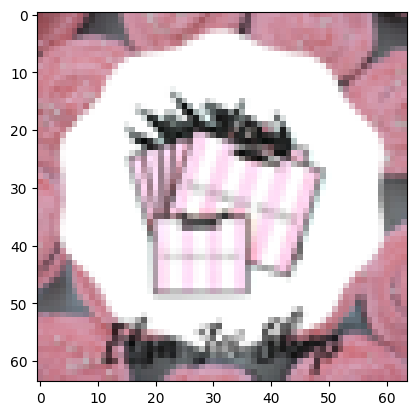

In [ ]:
X0 = X_ar[0].reshape([64,64,3])
plt.imshow(X0)

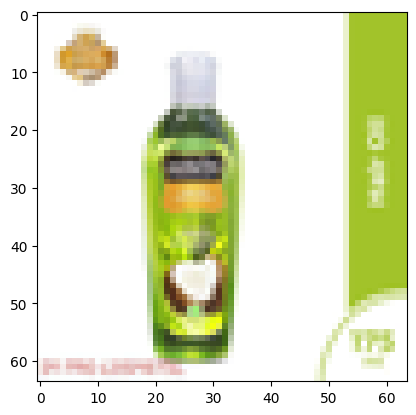

In [ ]:
X0_val = X_ar_val[0].reshape([64,64,3])
plt.imshow(X0_val)

In [ ]:
# normalize the image
X_ar_normalized = X_ar / 255.0
X_ar_val_normalized = X_ar_val / 255.0

In [ ]:
train['title_translate']

0                              Victoria's Secret Paper Bag
1        Double Tape 3M VHB 12 mm x 4.5 m ORIGINAL / DO...
2              Maling TTS Canned Pork Luncheon Meat 397 gr
3        Short sleeve Batik negligee - Random / Mixed P...
4                        Nescafe \xc3\x89clair Latte 220ml
                               ...                        
29598    Battery Battery Xiaomi Redmi Note 3 BM46 BM-46...
29599    Washable 75 gsm Non-Woven Spunbond Fabric Mask...
29600    KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...
29601    Broth NON MSG HALAL Mama Kamu Free-range Chick...
29602    LEAK COATING FLEX TAPE / MAGIC ISOLATION / LEA...
Name: title_translate, Length: 29603, dtype: object

In [ ]:
validate['title_translate']

0                       Mustika Ratu Oil Cem-Ceman 175 ml
1         Snobby Baby Mosquito Net Snobby 1 Pole KBX 1201
2                                           mini stoppers
3                      F916/304 Jelly Slides Wedges Shoes
4       \xe3\x80\x90CELEB\xe3\x80\x91100 Pcs Korean St...
                              ...                        
4642    Sweety Silver Pants BOYS GIRLS M30 L28 XL26 XX...
4643                                           Mayonnaise
4644        Fair N Pink Body Serum natural body whitening
4645                               Wholesale mask brushes
4646         Light Blue Skinny Pencil Men's Jeans 27 - 38
Name: title_translate, Length: 4647, dtype: object

In [ ]:
import re, string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# function to clean the translated titles before embedding
def clean_title(title):
    # Remove all non-alphanumeric characters and convert to lowercase
    clean1 = re.sub(r'[^a-zA-Z0-9\s]', '', title).lower()
    # Split the cleaned string into words
    clean2 = re.split('\W+', clean1)
    # Remove stopwords and short words
    title_cleaned = [word for word in clean2 if (word not in stopwords.words('english')) & (len(word) > 2)]
    # Join the cleaned words using a space separator
    title_cleaned = ' '.join(title_cleaned)
    return title_cleaned

In [ ]:
# clean the title in the train dataset
train['title_cleaned'] = train['title_translate'].apply(clean_title)
validate['title_cleaned'] = validate['title_translate'].apply(clean_title)

In [ ]:
train.head()

,Unnamed: 0,posting_id,image,image_phash,title,label_group,title_translate,title_cleaned
0,0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,Victoria's Secret Paper Bag,victorias secret paper bag
1,1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,Double Tape 3M VHB 12 mm x 4.5 m ORIGINAL / DO...,double tape vhb original double foam tape
2,2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,Maling TTS Canned Pork Luncheon Meat 397 gr,maling tts canned pork luncheon meat 397
3,3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,Short sleeve Batik negligee - Random / Mixed P...,short sleeve batik negligee random mixed patte...
4,4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,Nescafe \xc3\x89clair Latte 220ml,nescafe xc3x89clair latte 220ml


In [ ]:
validate.head()

,Unnamed: 0,posting_id,image,image_phash,title,label_group,title_translate,title_cleaned
0,11443,train_1003554842,560a5c3577fb22be2ac82c0e97558158.jpg,f3c78fce8c3050f0,Mustika Ratu Minyak Cem-Ceman 175 ml,3044373336,Mustika Ratu Oil Cem-Ceman 175 ml,mustika ratu oil cemceman 175
1,29516,train_523363809,dd1f14c7a734ff28b67062ae4f8529c6.jpg,af919a66c49d688b,Snobby Kelambu Box Bayi Snobby 1 Tiang KBX 1201,873493898,Snobby Baby Mosquito Net Snobby 1 Pole KBX 1201,snobby baby mosquito net snobby pole kbx 1201
2,6976,train_1036373061,34b4aa697f4606fcf52ec74f53c9f246.jpg,dc132bece40552db,stopper mini,578575602,mini stoppers,mini stoppers
3,17316,train_3107279377,8255718baadd70981be5f49de9ff270b.jpg,e691986c9586cdec,Sepatu Wedges Selop Jelly F916/304,1376270839,F916/304 Jelly Slides Wedges Shoes,f916304 jelly slides wedges shoes
4,10476,train_2073151758,4e8d8a4d98f98dd41be729476d498701.jpg,f7b9c25c64433926,\xe3\x80\x90CELEB\xe3\x80\x91100 Pcs Ikat Ramb...,994676122,\xe3\x80\x90CELEB\xe3\x80\x91100 Pcs Korean St...,xe3x80x90celebxe3x80x91100 pcs korean style el...


In [ ]:
len(train['label_group'])

29603

In [ ]:
len(validate['label_group'])

4647

In [ ]:
combined = pd.concat([train['label_group'],validate['label_group']])
combined

0        249114794
1       2937985045
2       2395904891
3       4093212188
4       3648931069
           ...    
4642    2808026978
4643    2314234752
4644    1209949003
4645    1623932098
4646     108185000
Name: label_group, Length: 34250, dtype: int64

In [ ]:
# label pre-processing: convert to group then perform onehot encoding

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert labels to integers using LabelEncoder
le = LabelEncoder()
labels_int = le.fit_transform(combined)

# One-hot encode the labels using to_categorical
y = to_categorical(labels_int)

# Print the shape of the one-hot encoded labels
print(y.shape)
print(y.shape[1])

(34250, 11014)
11014


In [ ]:
len(y)

34250

In [ ]:
y_train = y[0:len(train['label_group'])]
len(y_train)

29603

In [ ]:
y_val = y[-len(validate['label_group']):]
len(y_val)

4647

In [ ]:
# Create a mapping table between encoded labels and their original label groups
label_mapping = {i: label for i, label in enumerate(le.classes_)}

# Convert the mapping table to a DataFrame
label_mapping_df = pd.DataFrame(list(label_mapping.items()), columns=['Encoded Label', 'Original Label'])

# Print the DataFrame
print(label_mapping_df)

       Encoded Label  Original Label
0                  0          258047
1                  1          297977
2                  2          645628
3                  3          801176
4                  4          887886
...              ...             ...
11009          11009      4292154092
11010          11010      4292520070
11011          11011      4292939171
11012          11012      4293276364
11013          11013      4294197112

[11014 rows x 2 columns]


In [ ]:
# Dataset already split from import csv files
X_image_train = X_ar_normalized
X_image_val = X_ar_val_normalized

Since the dataset consists of text (title description) and image, we consider using CNN Model and image to train the model, and combined with text title using TF-ITDF in CNN layers, then predict the label groups.

# TFIDF-CNN Model

To create a model that takes two inputs, we need to use the Functional API instead of the Sequential API.

The Sequential API is a straightforward way to create a neural network model by stacking layers on top of each other in a linear fashion. However, when dealing with models that have multiple inputs or outputs, the Sequential API is not sufficient.

The Functional API, on the other hand, provides more flexibility in building complex models with multiple inputs and outputs. It allows for more control over how the inputs and outputs are connected to the layers and how the data flows through the network. This flexibility is achieved by defining the input and output layers separately, then connecting the layers using the functional API's various methods.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_text_train = train['title_cleaned']
X_text_val = validate['title_cleaned']

In [ ]:
# Define the neural network model
# Use a convolutional neural network (CNN) to process the image data.
# Use a recurrent neural network (RNN) to process the text data.
# Combine the outputs of the two networks using a concatenation layer.
# Add dense layers to the combined output to make the final prediction.

# define the image input
image_input = layers.Input(shape=X_ar_normalized.shape[1:], name='image_input')

# define the convolutional layers for the image input
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)  # add dropout here
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)  # add dropout here
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = Dropout(0.25)(x)  # add dropout here
x = layers.Dense(64, activation='relu')(x)

In [ ]:
# define the text input
text_input = layers.Input(shape=(None,), dtype='string', name='text_input')

In [ ]:
# define the TfidfVectorizer to transform the text input
tfidf = TfidfVectorizer()
# text_features = tfidf.fit_transform(train['title_clean'])
text_features_train = tfidf.fit_transform(X_text_train)
text_features_val = tfidf.transform(X_text_val)
text_features_input = layers.Input(shape=(text_features_train.shape[1],), name='text_features_input')

In [ ]:
# concatenate the image and text features
concatenated = layers.concatenate([x, text_features_input])

In [ ]:
# define the output layer
output_layer = Dense(y.shape[1], activation='softmax', name='output')(concatenated) #Need to change if more group labels

In [ ]:
# define the model with the two inputs and one output
model1 = Model(inputs=[image_input, text_features_input], outputs=output_layer)

In [ ]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image_input (InputLayer)       [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 62, 62, 32)   896         ['image_input[0][0]']            
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 31, 31, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 dropout (Dropout)              (None, 31, 31, 32)   0           ['max_pooling2d[0][0]']          
                                                                                              

In [ ]:
# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model1.fit(x=[X_image_train, text_features_train.toarray()], 
                     y=y_train, epochs=10, batch_size=32, 
                     validation_data=([X_image_val, text_features_val.toarray()], y_val))

In [ ]:
# Save the trained model
model1.save('TFIDF_combined_model.h5')

In [ ]:
# Get the predicted probabilities for each class on the validation set
y_pred_prob = model1.predict([X_image_val, text_features_val.toarray()])

# Get the predicted labels
y_pred = np.argmax(y_pred_prob, axis=1)

val_acc = history.history['val_accuracy']
confidence_level = y_pred_prob[np.arange(len(y_pred)), y_pred]

146/146 [==============================] - 1s 9ms/step


In [ ]:
# Print the predicted labels, their corresponding confidence levels, and the validation accuracy
for i in range(len(y_pred)):
    print('Predicted label:', y_pred[i], 'with confidence level:', confidence_level[i])
print('Validation accuracy:', val_acc[-1])

In [ ]:
# Import the model
from keras.models import load_model

history3 = load_model('TFIDF_combined_model.h5')

In [ ]:
# Evaluate the model using the import model
loss, accuracy = history3.evaluate([X_image_val, text_features_val.toarray()], y_val)
print('Test accuracy:', accuracy)

146/146 [==============================] - 3s 20ms/step - loss: 8.3675 - accuracy: 0.4078
Test accuracy: 0.4077899754047394


# TFIDF-CNN Final Model

In [ ]:
history = model1.fit(x=[X_image_train, text_features_train.toarray()], 
                     y=y_train, epochs=25, batch_size=32, 
                     validation_data=([X_image_val, text_features_val.toarray()], y_val))

Epoch 1/25
926/926 [==============================] - 74s 79ms/step - loss: 9.0495 - accuracy: 0.1224 - val_loss: 8.8845 - val_accuracy: 0.2124
Epoch 2/25
926/926 [==============================] - 72s 77ms/step - loss: 8.4677 - accuracy: 0.1580 - val_loss: 8.3977 - val_accuracy: 0.1640
Epoch 3/25
926/926 [==============================] - 72s 78ms/step - loss: 7.7775 - accuracy: 0.1534 - val_loss: 7.8623 - val_accuracy: 0.1661
Epoch 4/25
926/926 [==============================] - 72s 78ms/step - loss: 7.0224 - accuracy: 0.1906 - val_loss: 7.3602 - val_accuracy: 0.2130
Epoch 5/25
926/926 [==============================] - 71s 77ms/step - loss: 6.3291 - accuracy: 0.2630 - val_loss: 6.9297 - val_accuracy: 0.2350
Epoch 6/25
926/926 [==============================] - 71s 77ms/step - loss: 5.5788 - accuracy: 0.3541 - val_loss: 6.5118 - val_accuracy: 0.3039
Epoch 7/25
926/926 [==============================] - 71s 77ms/step - loss: 4.8098 - accuracy: 0.4541 - val_loss: 6.3163 - val_accuracy:

In [ ]:
# Save the trained model
model1.save('final_model.h5')

In [ ]:
# Import the model
from keras.models import load_model

final_model = load_model('final_model.h5')

In [ ]:
# Evaluate the model using the import model
loss, accuracy = final_model.evaluate([X_image_val, text_features_val.toarray()], y_val)
print('Test accuracy:', accuracy)

146/146 [==============================] - 3s 19ms/step - loss: 7.6872 - accuracy: 0.5104
Test accuracy: 0.5104368329048157
